In [1]:
import random
import numpy as np
from PIL import Image, ImageDraw 
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Rasmni o'zgartrish RGB -> LAB

In [7]:
image = Image.open("img1.jpg")

width = image.size[0]
height = image.size[1]

imgnew  = Image.new( mode = "L", size = (width, height) )
imgnew2  = Image.new( mode = "L", size = (width, height) )
# imgnewdiff  = Image.new( mode = "L", size = (width, height) )

pix = image.load()

imgnewpix=imgnew.load()
imgnewpix2=imgnew2.load()


def rgb2lab ( inputColor ) :
   num = 0
   RGB = [0, 0, 0]
   for value in inputColor :
       value = float(value) / 255

       if value > 0.04045 :
           value = ( ( value + 0.055 ) / 1.055 ) ** 2.4
       else :
           value = value / 12.92

       RGB[num] = value * 100
       num = num + 1

   XYZ = [0, 0, 0,]

   X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
   Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
   Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
   XYZ[ 0 ] = round( X, 4 )
   XYZ[ 1 ] = round( Y, 4 )
   XYZ[ 2 ] = round( Z, 4 )

   XYZ[ 0 ] = float( XYZ[ 0 ] ) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
   XYZ[ 1 ] = float( XYZ[ 1 ] ) / 100.0          # ref_Y = 100.000
   XYZ[ 2 ] = float( XYZ[ 2 ] ) / 108.883        # ref_Z = 108.883

   num = 0
   for value in XYZ :

       if value > 0.008856 :
           value = value ** ( 0.3333333333333333 )
       else :
           value = ( 7.787 * value ) + ( 16 / 116 )

       XYZ[num] = value
       num = num + 1

   Lab = [0, 0, 0]

   L = ( 116 * XYZ[ 1 ] ) - 16
   a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
   b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

   Lab [ 0 ] = round( L, 4 )
   Lab [ 1 ] = round( a, 4 )
   Lab [ 2 ] = round( b, 4 )

   return Lab

for i in range(width):
    for j in range(height):
        imgnewpix[i,j]=rgb2lab(pix[i,j]);

fig = plt.figure(figsize=(15, 15))
rows, columns=(1,2)

# showing image 
fig.add_subplot(rows, columns, 1) 
plt.imshow(image,cmap='gray') 
plt.axis('off') 
plt.title("Orginal")

# showing image 
fig.add_subplot(rows, columns, 2) 
plt.imshow(imgnew,cmap='gray') 
plt.axis('off') 
plt.title("RGB -> HSV")

TypeError: color must be int or single-element tuple

Text(0.5, 1.0, 'RGB -> HSV')

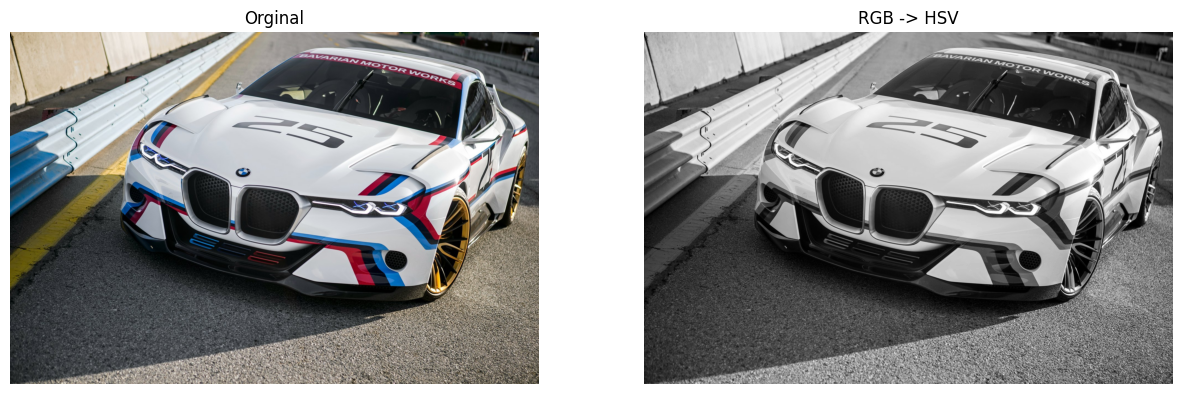

In [6]:
image = Image.open("img1.jpg")

width = image.size[0]
height = image.size[1]

imgnew  = Image.new( mode = "L", size = (width, height) )
imgnew2  = Image.new( mode = "L", size = (width, height) )
# imgnewdiff  = Image.new( mode = "L", size = (width, height) )

pix = image.load()

imgnewpix=imgnew.load()
imgnewpix2=imgnew2.load()

for i in range(width):
    for j in range(height):
        imgnewpix[i,j]=(pix[i,j][0]+pix[i,j][1]+pix[i,j][2])//3; #o'rtacha qiymat bo'yicha
        imgnewpix2[i,j]=int(0.299*pix[i,j][0]+0.587*pix[i,j][1]+0.144*pix[i,j][2]); # Average Method
        
fig = plt.figure(figsize=(15, 15))
rows, columns=(1,2)

fig.add_subplot(rows, columns, 1) 
# showing image 
plt.imshow(image,cmap='gray') 
plt.axis('off') 
plt.title("Orginal")


# showing image 
fig.add_subplot(rows, columns, 2) 
plt.imshow(imgnew,cmap='gray') 
plt.axis('off') 
plt.title("RGB -> HSV")

## RGB to HSV

In [ ]:
def rgb_to_hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return round(h, 2), round(s, 2), round(v, 2)

## RGB to YUV

In [ ]:
Y = 0.299R + 0.587G + 0.114B
U'= (B-Y)*0.565
V'= (R-Y)*0.713